# ROS task 2.2

#### Topics avalable
- /center_depth
- /center_rgb
- /device_0/sensor_0/Depth_0/image/data_1
- /device_0/sensor_0/Depth_0/image/data_2
- /device_0/sensor_0/Depth_0/image/data_3
- /device_0/sensor_1/Color_0/image/data_1
- /device_0/sensor_1/Color_0/image/data_2
- /device_0/sensor_1/Color_0/image/data_3
- /rosout
- /rosout_agg
- /sysInfo

In [1]:
# Imports 
import numpy as np
import cv2
import matplotlib.pyplot as plt

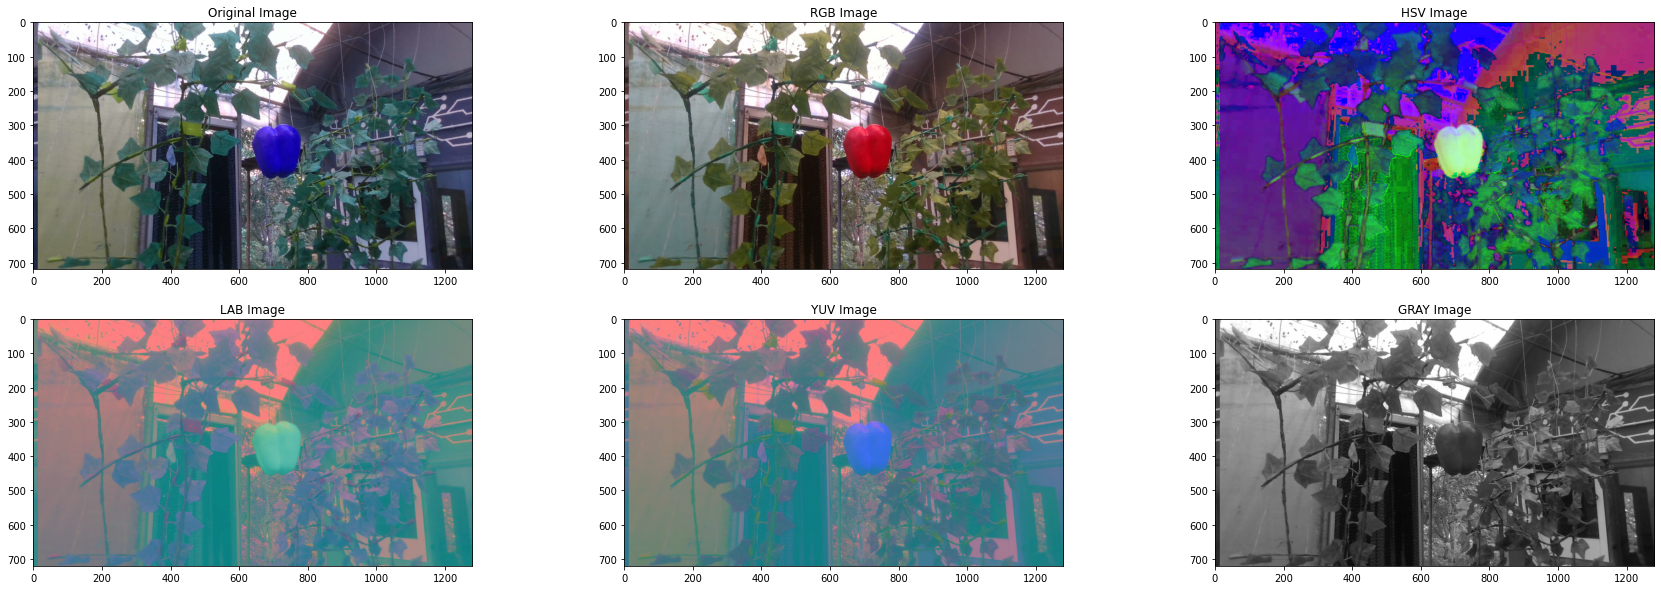

In [5]:
# import the image to be processed
img = cv2.imread('new4.jpg')

# create a figure of 2 rows and 3 columns to display the image using different color spaces
fig = plt.figure(figsize=(30, 10))
fig.add_subplot(2, 3, 1)

# add the original image to the figure
plt.imshow(img)
plt.title('Original Image')


# convert the image to RGB and add it to the figure
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 3, 2)
plt.imshow(rgb)
plt.title('RGB Image')

# convert the image to HSV and add it to the figure
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig.add_subplot(2, 3, 3)
plt.imshow(hsv)
plt.title('HSV Image')

# convert the image to LAB and add it to the figure
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
fig.add_subplot(2, 3, 4)
plt.imshow(lab)
plt.title('LAB Image')

# convert the image to YUV and add it to the figure
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
fig.add_subplot(2, 3, 5)
plt.imshow(yuv)
plt.title('YUV Image')

# convert the image to GRAY and add it to the figure
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig.add_subplot(2, 3, 6)
plt.imshow(gray, cmap='gray')
plt.title('GRAY Image')

# display the figure
plt.show()

#### use HSV color space to filter the color of the object

In [6]:
# get the lower and upper bounds of the color to be detected
green = np.uint8([[[192,15,41 ]]]) # put your color here
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)
print( hsv_green )

[[[176 235 192]]]


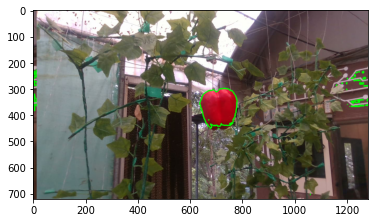

In [7]:
# Filter the image using blue color
# define range of blue color in HSV
lower_blue = np.array([166,100,100])
upper_blue = np.array([186,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(rgb,rgb, mask= mask)

# find the contours in the mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rgb,contours,-1,(0,255,0),3)

# display the image
plt.imshow(rgb)
plt.show()


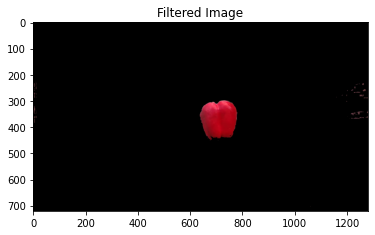

In [8]:
# display the image
plt.imshow(res)
plt.title('Filtered Image')
plt.show()

In [9]:
# apply the same but for the other image
img2 = cv2.imread('new3.jpg')

# convert to RGB
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# convert to HSV
hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

In [10]:
# get the lower and upper bounds of the color to be detected
green = np.uint8([[[250,126,0 ]]]) # put your color here
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)
print( hsv_green )

[[[ 15 255 250]]]


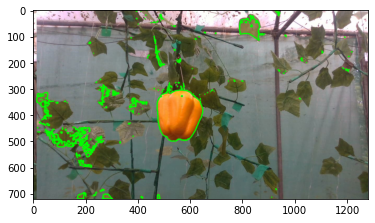

In [11]:
# Filter the image using blue color
# define range of blue color in HSV
lower_blue = np.array([5,100,100])
upper_blue = np.array([25,255,255])

# Threshold the HSV image to get only blue colors
mask2 = cv2.inRange(hsv2, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res2 = cv2.bitwise_and(rgb2, rgb2, mask= mask2)

# find the contours in the mask
contours2, hierarchy2 = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rgb2,contours2,-1,(0,255,0),3)

# display the image
plt.imshow(rgb2)
plt.show()

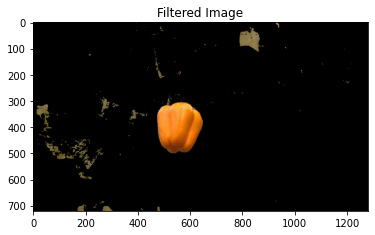

In [12]:
# display the image
plt.imshow(res2)
plt.title('Filtered Image')
plt.show()

#### Now is the time for combination of both colors and depth

In [13]:
# read the image
img = cv2.imread('new.jpg')

# convert to RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

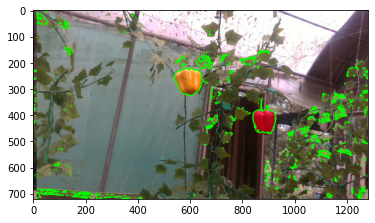

In [16]:
# define two blue boundaries, one for red and one for golden yellow
# for red
blueLower1 = np.array([166,100,100])
blueUpper1 = np.array([186,255,255])

# for golden yellow
blueLower2 = np.array([5,100,100])
blueUpper2 = np.array([25,255,255])

# Threshold the HSV image to get only blue colors
mask1 = cv2.inRange(hsv, blueLower1, blueUpper1)
mask2 = cv2.inRange(hsv, blueLower2, blueUpper2)

# combine the two masks
mask = mask1 | mask2

# Bitwise-AND mask and original image
res = cv2.bitwise_and(rgb,rgb, mask= mask)

# find the contours in the mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rgb,contours,-1,(0,255,0),3)

# display the image
plt.imshow(rgb)
plt.show()


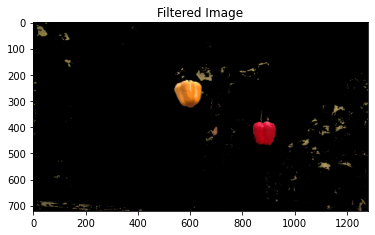

In [15]:
# display the image
plt.imshow(res)
plt.title('Filtered Image')
plt.show()


#### Next is to reduce the noise around the objects and to find the centeroid of the object

In [66]:
cv2.destroyAllWindows()

### Object Tracking
Now that we know how to convert a BGR image to HSV, we can use this to extract a colored object. In HSV, it is easier to represent a color than in BGR color-space. In our application, we will try to extract a blue colored object. So here is the method:

- Take each frame of the video
- Convert from BGR to HSV color-space
- We threshold the HSV image for a range of blue color
- Now extract the blue object alone, we can do whatever we want on that image

In [ ]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

#### How to find HSV values to track?

In [19]:
green = np.uint8([[[0,255,0 ]]]) # put your color here
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


#### Now you take [H-10, 100,100] and [H+10, 255, 255] as the lower bound and upper bound respectively. Apart from this method, you can use any image editing tools like GIMP or any online converters to find these values, but don't forget to adjust the HSV ranges.

### Scaling
Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes. You can resize an input image with either of following methods:

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('messi5.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

#### Opening Morphological Transformations
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel

### Countors
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

- 

In [ ]:
# code for countour detection
import numpy as np
import cv2

im = cv2.imread('test.jpg',cv2.IMREAD_COLOR)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for data in contours:
    print "The contours have this data %r" %data
cv2.drawContours(im,contours,-1,(0,255,0),3)
cv2.imshow('output',im)
while True:
    if cv2.waitKey(6) & 0xff == 27:
        break